In [1]:
from metrics import BinaryMetrics
import torch
import torchvision.transforms as transforms
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
import seaborn as sns
import numpy as np

from utils import generate_mask_path, generate_mask_df

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


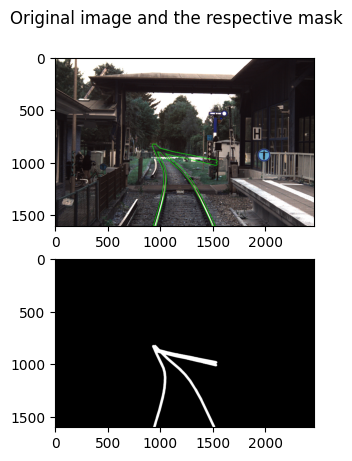

In [2]:
path_image = "../rail_detection/datasets/data_rgb/train/images/10_station_suelldorf_10.1_rgb_center_216_1631703820.700000000.png"
path_label = "../rail_detection/datasets/data_rgb/train/labels/10_station_suelldorf_10.1_rgb_center_216_1631703820.700000000.txt"
mask = generate_mask_path(path_image=path_image, path_label=path_label, print=True)

In [3]:
df = pd.read_json(max(glob("./dataframe_dumps/df_eda_*"), key=os.path.getmtime))
df = df[df["sensor"] == "rgb_highres_center"]

C:\Users\atkovacs\AppData\Local\Temp\ipykernel_2864\5639941.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json(max(glob("./dataframe_dumps/df_eda_*"), key=os.path.getmtime))


In [4]:
target = df.sample(1)

pred = []
for i in range(5):
    pred.append(df.sample(1))

1_calibration_1.2/rgb_highres_center/093_1631441723.400000017.png
3_fire_site_3.1/rgb_highres_center/029_1631639434.000000010.png
4_station_pedestrian_bridge_4.3/rgb_highres_center/061_1631704340.200000026.png
6_station_klein_flottbek_6.2/rgb_highres_center/068_1631704655.900000015.png
4_station_pedestrian_bridge_4.3/rgb_highres_center/010_1631704335.100000030.png
3_fire_site_3.1/rgb_highres_center/074_1631639438.500000006.png


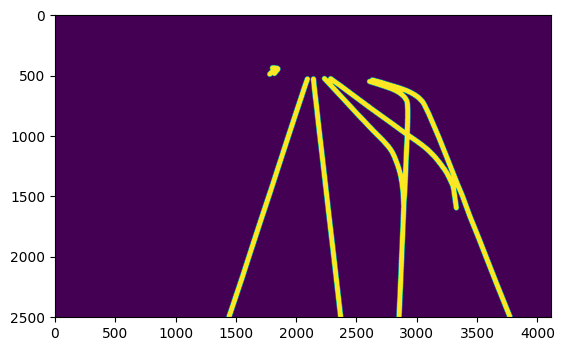

In [5]:
target_mask = (
    cv2.cvtColor(
        generate_mask_df(df, file=target.path.values[0], path="./orig_data/DB/"),
        cv2.COLOR_BGR2GRAY,
    )
    / 255
)
pred_mask = []

for i in range(len(pred)):
    pred_mask.append(
        cv2.cvtColor(
            generate_mask_df(df, file=pred[i].path.values[0], path="./orig_data/DB/"),
            cv2.COLOR_BGR2GRAY,
        )
        / 255
    )

pred_mask.append(np.zeros_like(target_mask).astype(np.float32))

plt.imshow(target_mask)

(2504, 4112)
(2504, 4112)
(2504, 4112)
(2504, 4112)
(2504, 4112)
(2504, 4112)


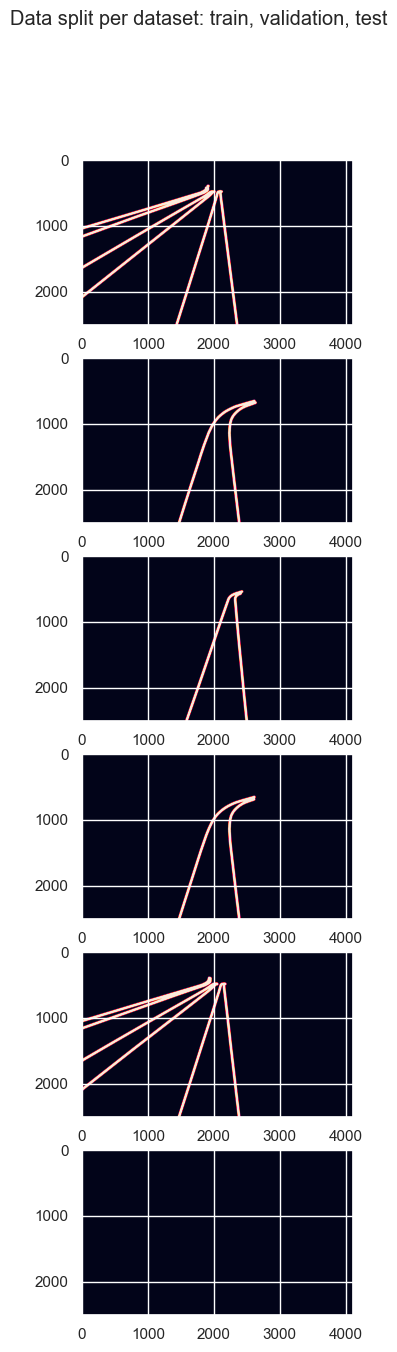

In [6]:
sns.set(rc={"figure.figsize": (15, 15)})

fig, ax = plt.subplots(len(pred_mask))
fig.suptitle("Data split per dataset: train, validation, test")

for i in range(len(pred_mask)):
    print(pred_mask[i].shape)
    ax[i].imshow(pred_mask[i])

In [7]:
transform = transforms.Compose([transforms.ToTensor()])

In [8]:
target_tensor = transform(target_mask)
target_tensor = target_tensor[None, :]
target_tensor.shape

torch.Size([1, 1, 2504, 4112])

In [22]:
pred_tensor = []
for i in range(len(pred_mask)):
    tmp = transform(pred_mask[i])
    pred_tensor.append(tmp[None, :])
    print(pred_tensor[-1].shape)

torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])


In [23]:
bm = BinaryMetrics()

In [24]:
for i in range(len(pred_tensor)):
    pixel_acc, dice, precision, specificity, recall, f1_score, iou = bm(
        y_pred=pred_tensor[i], y_true=target_tensor
    )
    print(
        f"""
        pixel_acc: {pixel_acc:.4f}
        dice: {dice:.4f}
        precision: {precision:.4f}
        specificity: {specificity:.4f}
        recall: {recall:.4f}
        f1_score: {f1_score:.4f}
        iou: {iou:.4f}
        ------------------------------------
        """
    )


        pixel_acc: 0.9425
        dice: 0.3449
        precision: 0.9582
        specificity: 0.9993
        recall: 0.2103
        f1_score: 0.3449
        iou: 0.2084
        ------------------------------------
        

        pixel_acc: 0.9062
        dice: 0.0594
        precision: 0.1070
        specificity: 0.9734
        recall: 0.0411
        f1_score: 0.0595
        iou: 0.0306
        ------------------------------------
        

        pixel_acc: 0.9445
        dice: 0.4949
        precision: 0.7185
        specificity: 0.9885
        recall: 0.3775
        f1_score: 0.4949
        iou: 0.3288
        ------------------------------------
        

        pixel_acc: 0.9092
        dice: 0.2667
        precision: 0.3185
        specificity: 0.9619
        recall: 0.2294
        f1_score: 0.2667
        iou: 0.1539
        ------------------------------------
        

        pixel_acc: 0.9443
        dice: 0.4901
        precision: 0.7188
        specificity: 0.9887
  